Possible Data Sources
Here are the possible datasets you can use for this project:

New York City Open Data:

Charlotte Area Open Data:

Charlotte Area Quality of Life Data:

State of North Carolina:(Requires free registation)



From the Possible Data Sources above you will select data and build two models, one a regression model and one a classification model, using the sources above. The models should be on the same theme, e.g. transportation or education. You are very likely going to need to merge data from 2 or more pages.

Modelling
For each model (classification and regression) you are building you need to start with at least five features for each model. You will need to consider at least three different methods (GAMs, kNNs, etc.) for modelling your data. You should go through and document your model building process. Models should be assessed and descriptions of important predictors should be included.

Rubric
The following is the breakdown of the grading for this project. Doing just the basics will get you approximately an 85%, so please go ahead and do extras to impress us.


In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd


In [566]:
# load data
medianAge_df = pd.read_csv('Final Project 2302 Data - group 13.csv', na_values='--')
medianAge_df.head()

,NPA,median_age_of_residents_2022,high_speed_internet_access_2022,employment_2022,single_family_housing_2022_Raw,residential_occupancy_2022,home_ownership_2022,vacant_land_in_acres_2022,proximity_to_public_transportation_2022,street_connectivity_index_2022,proximity_to_school_age_care_2022,proximity_to_early_care_and_education_2022
0,2,33.0,76.6%,95.5%,504,94%,38.7%,21,1129,1.0,1121,651
1,3,31.0,91.6%,97.6%,1613,86.4%,38.9%,25,8510,2.0,6605,7502
2,4,44.0,91.9%,98%,364,89.7%,100%,13,353,1.0,162,172
3,5,31.0,63.9%,84.7%,189,94%,23.2%,36,336,1.0,346,346
4,6,36.0,59.8%,100%,675,88%,31.5%,37,811,1.0,789,811


In [567]:
# check for null valeus
print(medianAge_df.isnull().sum())

NPA                                           0
median_age_of_residents_2022                  2
high_speed_internet_access_2022               3
employment_2022                               2
single_family_housing_2022_Raw                0
residential_occupancy_2022                    2
home_ownership_2022                           3
vacant_land_in_acres_2022                     0
proximity_to_public_transportation_2022       0
street_connectivity_index_2022                1
proximity_to_school_age_care_2022             0
proximity_to_early_care_and_education_2022    0
dtype: int64


In [568]:
# Clean 'high_speed_internet_access_2022'
medianAge_df['high_speed_internet_access_2022'] = pd.to_numeric(
    medianAge_df['high_speed_internet_access_2022'].astype(str).str.replace('%', '', regex=False),
    errors='coerce'
)

# Clean 'employment_2022'
medianAge_df['employment_2022'] = pd.to_numeric(
    medianAge_df['employment_2022'].astype(str).str.replace('%', '', regex=False),
    errors='coerce'
)

# Clean 'residential_occupancy_2022'
medianAge_df['residential_occupancy_2022'] = pd.to_numeric(
    medianAge_df['residential_occupancy_2022'].astype(str).str.replace('%', '', regex=False),
    errors='coerce'
)

# Clean 'home_ownership_2022'
medianAge_df['home_ownership_2022'] = pd.to_numeric(
    medianAge_df['home_ownership_2022'].astype(str).str.replace('%', '', regex=False),
    errors='coerce'
)


In [569]:
# Fill missing values with the mean value (without using inplace=True)
medianAge_df['median_age_of_residents_2022'] = medianAge_df['median_age_of_residents_2022'].fillna(medianAge_df['median_age_of_residents_2022'].mean())
medianAge_df['high_speed_internet_access_2022'] = medianAge_df['high_speed_internet_access_2022'].fillna(medianAge_df['high_speed_internet_access_2022'].mean())
medianAge_df['employment_2022'] = medianAge_df['employment_2022'].fillna(medianAge_df['employment_2022'].mean())
medianAge_df['residential_occupancy_2022'] = medianAge_df['residential_occupancy_2022'].fillna(medianAge_df['residential_occupancy_2022'].mean())


In [570]:
# check infor
medianAge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NPA                                         459 non-null    int64  
 1   median_age_of_residents_2022                459 non-null    float64
 2   high_speed_internet_access_2022             459 non-null    float64
 3   employment_2022                             459 non-null    float64
 4   single_family_housing_2022_Raw              459 non-null    int64  
 5   residential_occupancy_2022                  459 non-null    float64
 6   home_ownership_2022                         456 non-null    float64
 7   vacant_land_in_acres_2022                   459 non-null    int64  
 8   proximity_to_public_transportation_2022     459 non-null    int64  
 9   street_connectivity_index_2022              458 non-null    float64
 10  proximity_to_s

In [571]:
# check description
medianAge_df.describe()

,NPA,median_age_of_residents_2022,high_speed_internet_access_2022,employment_2022,single_family_housing_2022_Raw,residential_occupancy_2022,home_ownership_2022,vacant_land_in_acres_2022,proximity_to_public_transportation_2022,street_connectivity_index_2022,proximity_to_school_age_care_2022,proximity_to_early_care_and_education_2022
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,456.000000,459.000000,459.000000,458.000000,459.000000,459.000000
mean,235.363834,37.251641,81.013596,95.006783,607.884532,92.862144,57.602193,115.764706,763.775599,1.054585,721.965142,712.392157
std,136.385677,7.535369,13.273171,5.456463,475.367261,7.373456,27.753108,236.051955,954.038758,0.227417,830.512426,882.915171
min,2.000000,18.000000,25.100000,44.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,118.500000,32.000000,74.050000,93.200000,270.000000,89.800000,38.850000,10.000000,247.000000,1.000000,274.000000,258.500000
50%,234.000000,36.000000,84.500000,96.300000,547.000000,94.000000,59.550000,31.000000,617.000000,1.000000,598.000000,567.000000
75%,352.500000,42.000000,90.400000,98.500000,837.500000,97.550000,81.350000,108.000000,1046.500000,1.000000,988.000000,965.000000
max,476.000000,75.000000,100.000000,100.000000,3722.000000,100.000000,100.000000,1758.000000,13800.000000,2.000000,12426.000000,13700.000000


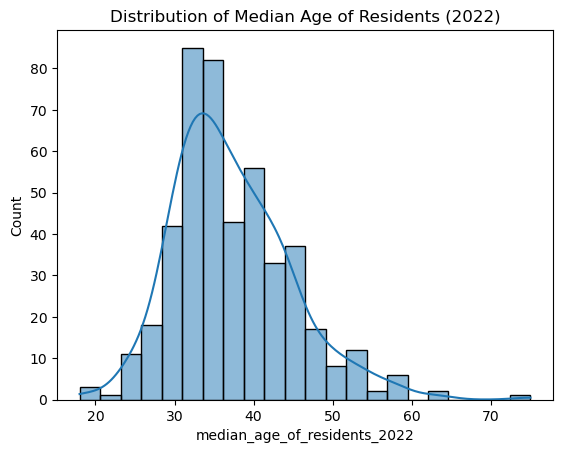

In [572]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(medianAge_df['median_age_of_residents_2022'], kde=True)
plt.title('Distribution of Median Age of Residents (2022)')
plt.show()


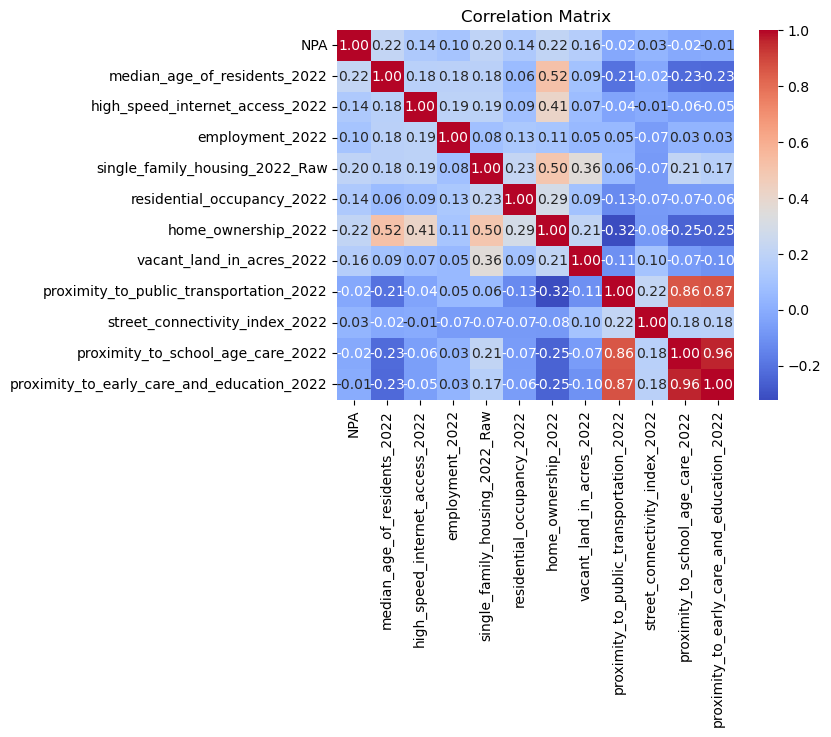

In [573]:
correlation_matrix = medianAge_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [574]:
# VIF for median_age_of_residents_2022
features = [
    'median_age_of_residents_2022',
    'high_speed_internet_access_2022',
    'employment_2022',
    'residential_occupancy_2022',
    'home_ownership_2022',
    'vacant_land_in_acres_2022',
    'proximity_to_public_transportation_2022',
    'street_connectivity_index_2022',
    'proximity_to_school_age_care_2022',
    'proximity_to_early_care_and_education_2022',
    'single_family_housing_2022_Raw',
    'NPA'
]
X = medianAge_df[features].copy()

X = add_constant(X)
X = X.replace([np.inf, -np.inf], np.nan)  # Replace infs with NaNs
X = X.dropna()  # Drop rows with any NaNs

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                       Feature         VIF
0                                        const  674.488875
1                 median_age_of_residents_2022    1.518938
2              high_speed_internet_access_2022    1.275767
3                              employment_2022    1.081476
4                   residential_occupancy_2022    1.190419
5                          home_ownership_2022    2.431223
6                    vacant_land_in_acres_2022    1.234386
7      proximity_to_public_transportation_2022    4.706450
8               street_connectivity_index_2022    1.110313
9            proximity_to_school_age_care_2022   15.246937
10  proximity_to_early_care_and_education_2022   15.673955
11              single_family_housing_2022_Raw    1.884430
12                                         NPA    1.115193


In [575]:
# drop high VIF features
medianAge_df = medianAge_df.drop(['proximity_to_early_care_and_education_2022'], axis=1)

In [576]:
features = [
    'median_age_of_residents_2022',
    'high_speed_internet_access_2022',
    'employment_2022',
    'residential_occupancy_2022',
    'home_ownership_2022',
    'vacant_land_in_acres_2022',
    'proximity_to_public_transportation_2022',
    'street_connectivity_index_2022',
    'proximity_to_school_age_care_2022',
    'single_family_housing_2022_Raw',
    'NPA'
]
X = medianAge_df[features].copy()

X = add_constant(X)
X = X.replace([np.inf, -np.inf], np.nan)  # Replace infs with NaNs
X = X.dropna()  # Drop rows with any NaNs

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                    Feature         VIF
0                                     const  672.247648
1              median_age_of_residents_2022    1.515590
2           high_speed_internet_access_2022    1.275338
3                           employment_2022    1.081454
4                residential_occupancy_2022    1.181877
5                       home_ownership_2022    2.423834
6                 vacant_land_in_acres_2022    1.220763
7   proximity_to_public_transportation_2022    4.295498
8            street_connectivity_index_2022    1.109950
9         proximity_to_school_age_care_2022    4.441183
10           single_family_housing_2022_Raw    1.876748
11                                      NPA    1.110922


In [577]:
print(dt.feature_importances_)

[0.13723497 0.02732125 0.         0.0271422  0.65289133 0.05770908
 0.02782611 0.         0.06987506]


In [578]:
print(X.columns)


Index(['const', 'median_age_of_residents_2022',
       'high_speed_internet_access_2022', 'employment_2022',
       'residential_occupancy_2022', 'home_ownership_2022',
       'vacant_land_in_acres_2022', 'proximity_to_public_transportation_2022',
       'street_connectivity_index_2022', 'proximity_to_school_age_care_2022',
       'single_family_housing_2022_Raw', 'NPA'],
      dtype='object')


In [579]:
# Drop rows with missing values
medianAge_df = medianAge_df.dropna()
decision_tree_df = medianAge_df
# Define features and target
X = decision_tree_df.drop(columns=['median_age_of_residents_2022'])
y = decision_tree_df['median_age_of_residents_2022']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Regressor with max_depth 5
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test_scaled)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 58.040124234644274
Mean Absolute Error: 5.261169440413977
R-squared: 0.07154915370608272


In [580]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [5, 10, 15, 20]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5}
Best Score: -42.52524107617551


In [581]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


In [582]:
print(shap_values[1].shape)
print(X_test_scaled_df.iloc[:10].shape)

(10, 36)
(10, 10)


100%|██████████| 10/10 [00:01<00:00,  7.07it/s]


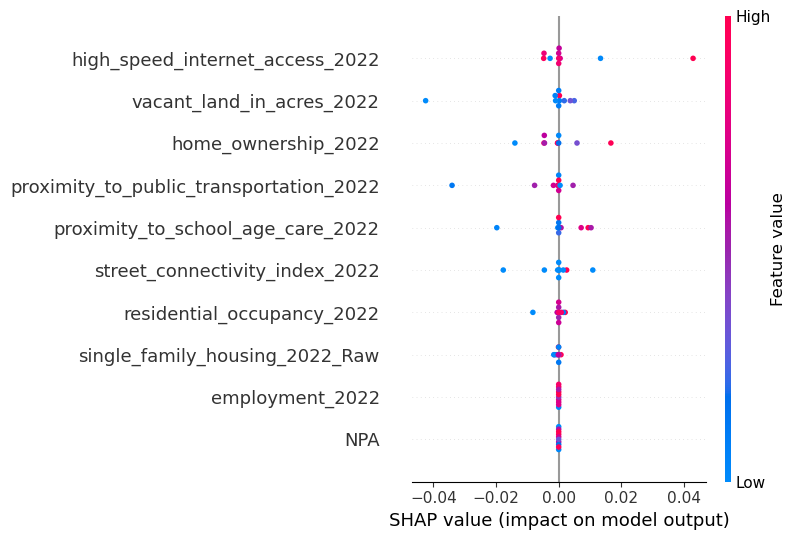

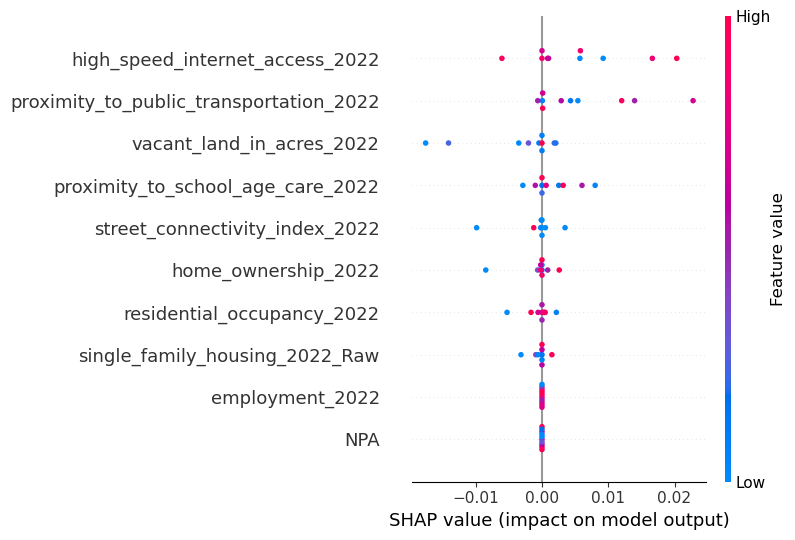

In [583]:
# Compute SHAP values for a few samples (to keep it fast)
shap_values = explainer.shap_values(X_test_scaled_df.iloc[:10])

# Plot the SHAP values for class 1 (index 1)
shap.summary_plot(shap_values[1][:, :10], X_test_scaled_df.iloc[:10])

# Plot the SHAP values for class 0 (index 0)
shap.summary_plot(shap_values[0][:, :10], X_test_scaled_df.iloc[:10])


In [584]:
# drop employment_2022 and NPA and single_family_housing_2022_Raw
logReg_df = medianAge_df.drop(['employment_2022', 'NPA', 
                                  'single_family_housing_2022_Raw', 'vacant_land_in_acres_2022',
                                  'residential_occupancy_2022'], axis=1)

# Define features and new binary target
X = logReg_df.drop(columns=['median_age_of_residents_2022', 'above_35'])
y = logReg_df['above_35']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict and evaluate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = logreg.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

KeyError: "['above_35'] not found in axis"

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pruned = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,  # Limits depth of trees
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf_pruned.fit(X_train_scaled, y_train)
y_pred_pruned = rf_pruned.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score
print("Classification Report (Pruned RF):")
print(classification_report(y_test, y_pred_pruned))
print("Accuracy:", accuracy_score(y_test, y_pred_pruned))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix (Pruned RF):")
print(confusion_matrix(y_test, y_pred_pruned))


Classification Report (Pruned RF):
              precision    recall  f1-score   support

           0       0.64      0.49      0.56        55
           1       0.71      0.82      0.76        82

    accuracy                           0.69       137
   macro avg       0.67      0.65      0.66       137
weighted avg       0.68      0.69      0.68       137

Accuracy: 0.6861313868613139
Confusion Matrix (Pruned RF):
[[27 28]
 [15 67]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, error_score='raise')

# Fit GridSearchCV to the data
try:
    grid_search.fit(X_train_scaled, y_train)
except Exception as e:
    print(f"An error occurred: {e}")
else:
    # Print the best parameters and the best score
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)

    # Use the best estimator found by GridSearchCV
    best_rf = grid_search.best_estimator_

    # Make predictions with the tuned Random Forest model
    y_pred_tuned = best_rf.predict(X_test_scaled)

    # Evaluate the tuned model
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
    print("Classification Report (Tuned Random Forest):")
    print(classification_report(y_test, y_pred_tuned))

    print("Confusion Matrix (Tuned Random Forest):")
    print(confusion_matrix(y_test, y_pred_tuned))

    print("Accuracy (Tuned Random Forest):", accuracy_score(y_test, y_pred_tuned))

    # Print the CV results
    print(grid_search.cv_results_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score found:  0.7485119047619048
Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.61      0.60      0.61        55
           1       0.73      0.74      0.74        82

    accuracy                           0.69       137
   macro avg       0.67      0.67      0.67       137
weighted avg       0.69      0.69      0.69       137

Confusion Matrix (Tuned Random Forest):
[[33 22]
 [21 61]]
Accuracy (Tuned Random Forest): 0.6861313868613139
{'mean_fit_time': array([0.20367165, 0.40553265, 0.59673867, 0.19803824, 0.40123324,
       0.57834644, 0.19684024, 0.3969418 , 0.57351809, 0.19083242,
       0.397157  , 0.57978525, 0.19290457, 0.3929193 , 0.59959831,
       0.20913148, 0.39759941, 0.57585335, 0.19978976, 0.3851